<a href="https://colab.research.google.com/github/pilipandr770/-Hw2.1.ipynb-Hw2.2.ipynb-Hw2.3.ipynb/blob/main/Hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

In [6]:
df = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України')[0]

In [7]:
# Виведення перших рядків таблиці
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [8]:
# Визначення розмірів датафрейму
shape = df.shape
print(f"Shape of DataFrame: {shape}")

Shape of DataFrame: (28, 9)


In [9]:
# Заміна значення "—" на NaN
df.replace("—", pd.NA, inplace=True)

In [10]:
# Визначення типів даних всіх стовпців
dtypes = df.dtypes
print(f"Data types:\n{dtypes}")

Data types:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [11]:
# Заміна типів нечислових колонок на числові
df = df.apply(pd.to_numeric, errors='ignore')

# Підрахунок частки пропусків у кожній колонці
missing_values_ratio = df.isnull().sum() / len(df)
print(f"Missing values ratio:\n{missing_values_ratio}")

Missing values ratio:
Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [13]:
# Видалення останнього рядка (дані по всій країні)
df = df.iloc[:-1]

In [16]:
import numpy as np  # Импортируем библиотеку NumPy

# Заполнение отсутствующих данных средними значениями, исключая нечисловые колонки
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [17]:
# Список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
average_birth_rate_2019 = df['2019'].mean()
regions_above_average_2019 = df[df['2019'] > average_birth_rate_2019]['Регіон'].tolist()
print(f"Regions with birth rate above average in 2019: {regions_above_average_2019}")

Regions with birth rate above average in 2019: ['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


In [18]:
# Регіон з найвищою народжуваністю у 2014 році
highest_birth_rate_2014_region = df.loc[df['2014'].idxmax(), 'Регіон']
print(f"Region with the highest birth rate in 2014: {highest_birth_rate_2014_region}")

Region with the highest birth rate in 2014: Рівненська


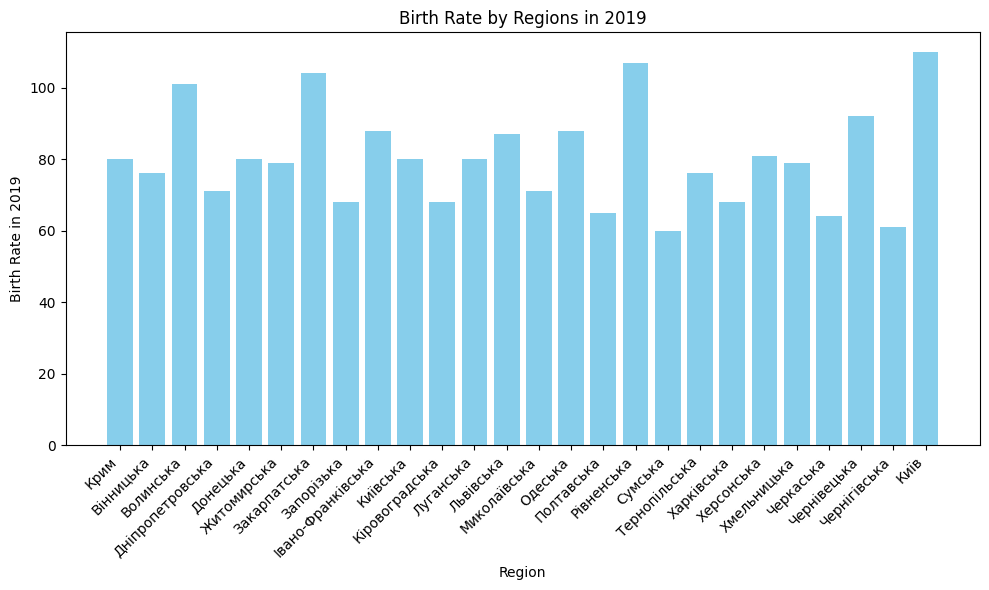

In [19]:
# Побудова стовпчикової діаграми народжуваності по регіонах у 2019 році
plt.figure(figsize=(10, 6))
plt.bar(df['Регіон'], df['2019'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Birth Rate in 2019')
plt.title('Birth Rate by Regions in 2019')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [20]:
# Збереження та відображення діаграми
plt.savefig('birth_rate_by_regions_2019.png')
plt.show()

<Figure size 640x480 with 0 Axes>